In [ ]:
Задача: Построить график продаж по дням и неделям год к году

<ipython-input-15-982dc3cf0c63>:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weeknum'] = df['date'].dt.week


<AxesSubplot:xlabel='datenum'>

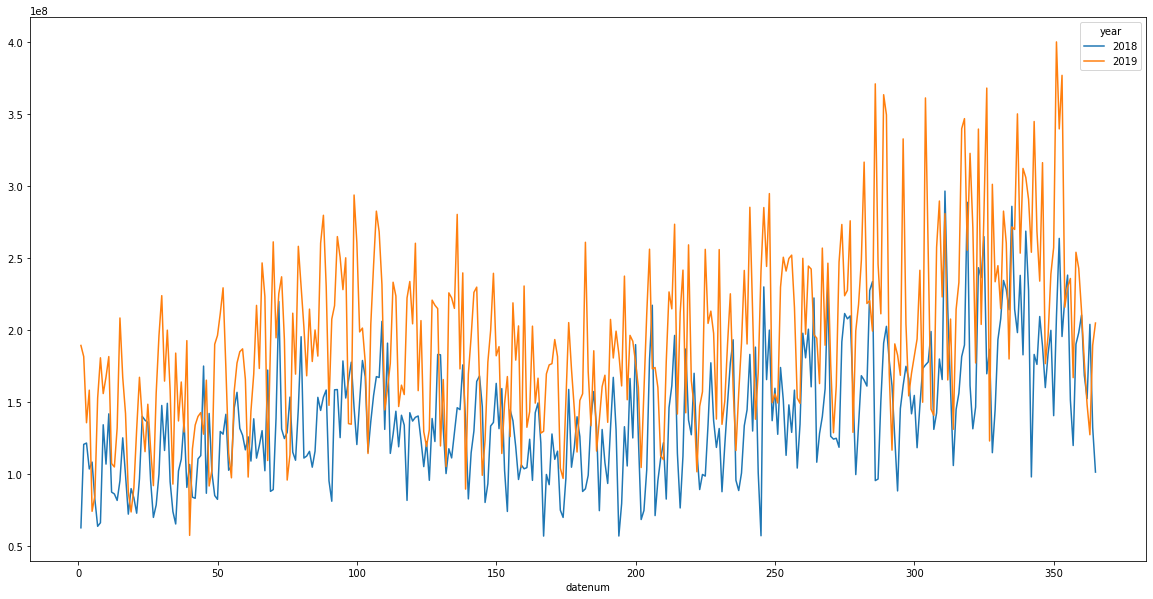

In [15]:
#подключаем БД с помощью sqlalchemy и pandas
import sqlalchemy as sa
import pandas as pd
import matplotlib.pyplot as plt
engine = sa.create_engine('sqlite:///hw.db')
meta = sa.MetaData()
meta.reflect(bind=engine)

prd_df = meta.tables['t']
sql = sa.select([prd_df])

with engine.connect() as cn:
    df = pd.read_sql(sql, cn)
cn.close()

#построим статистику продаж по дням недели год к году

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['weeknum'] = df['date'].dt.week
df['datenum'] = df['date'].dt.dayofyear
df['startOfWeek'] = df['date'] - df['date'].dt.weekday*pd.Timedelta(days=1)
df_t=(df.groupby(['datenum', 'year'])
        .sum()[['total']]
        .unstack())
df_t.columns = df_t.columns.get_level_values(1)
df_t.plot(figsize=(20,10))


In [ ]:
Визуально, в 2019 году продажи были больше

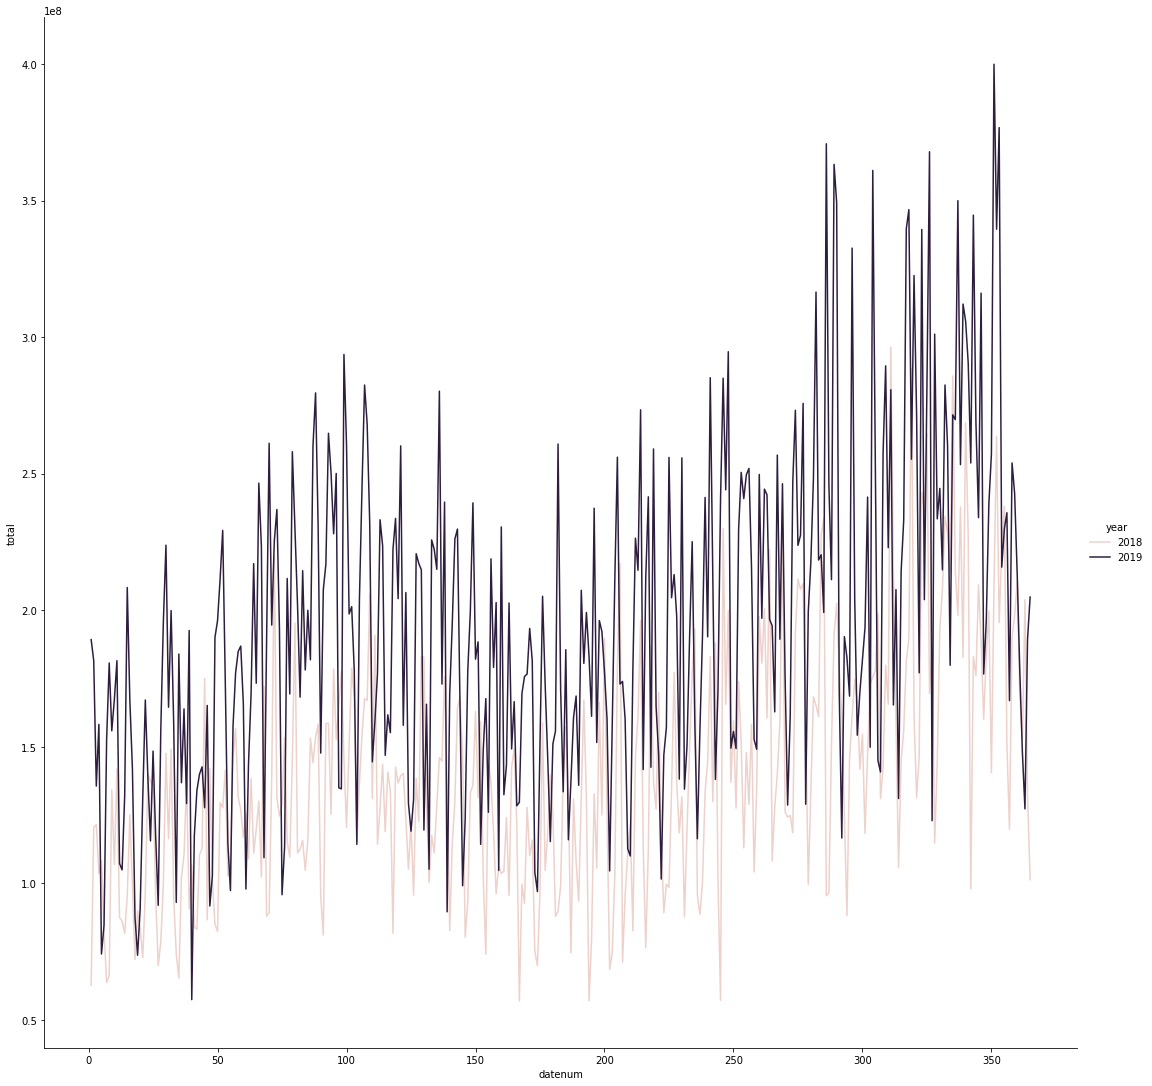

In [19]:
#построение того же графика, только с помощью seaborn
import seaborn as sns
df_t = df.groupby(['year', 'datenum'],as_index=False).sum()
g = sns.relplot(x='datenum', y='total', hue='year', kind='line', data=df_t, height=15)

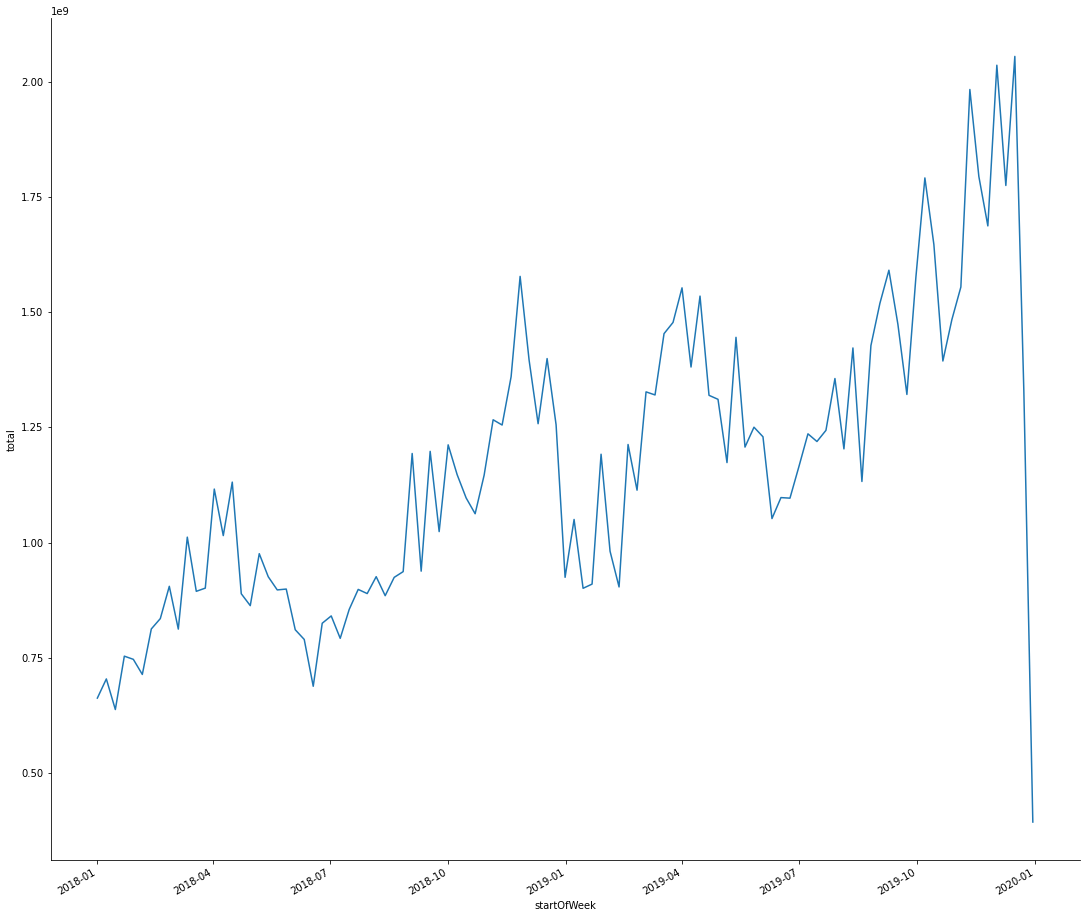

In [17]:
#построение сплошного графика за оба года
import seaborn as sns
df_t = df.groupby(['startOfWeek'],as_index=False).sum()
g = sns.relplot(x='startOfWeek', y='total', kind='line', data=df_t, height=15)
g.fig.autofmt_xdate()

<AxesSubplot:xlabel='weeknum'>

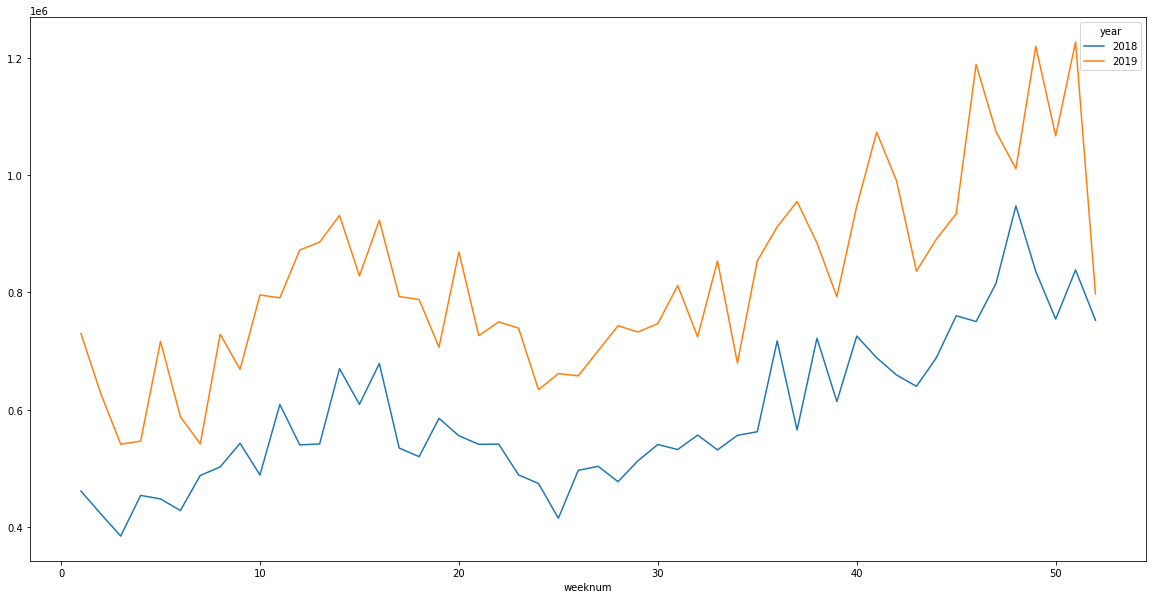

In [5]:
#сравнение продаж по неделям год к году
df_t=(df.groupby(['weeknum', 'year'])
        .sum()[['qty']]
        .unstack())
df_t.columns = df_t.columns.get_level_values(1)
df_t.plot(figsize=(20,10))